Dataset Shape: (891, 15)

First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------

/tmp/ipython-input-2772614618.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-2772614618.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

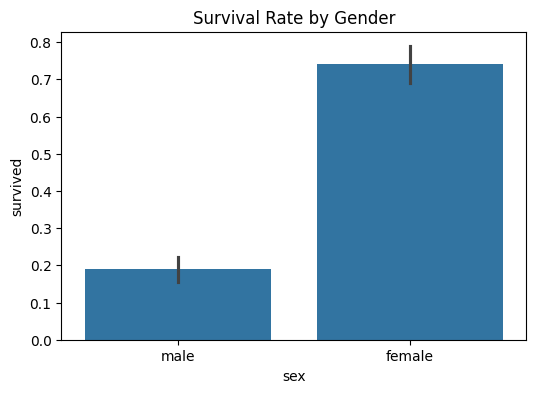

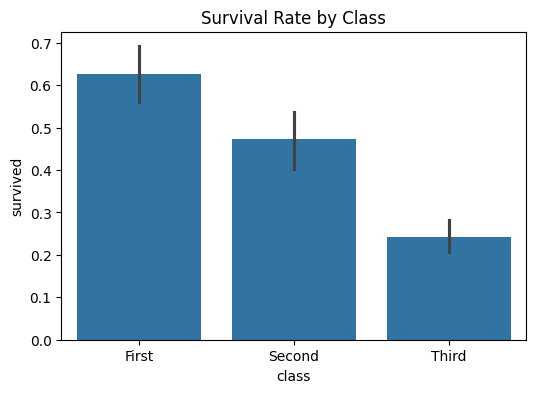

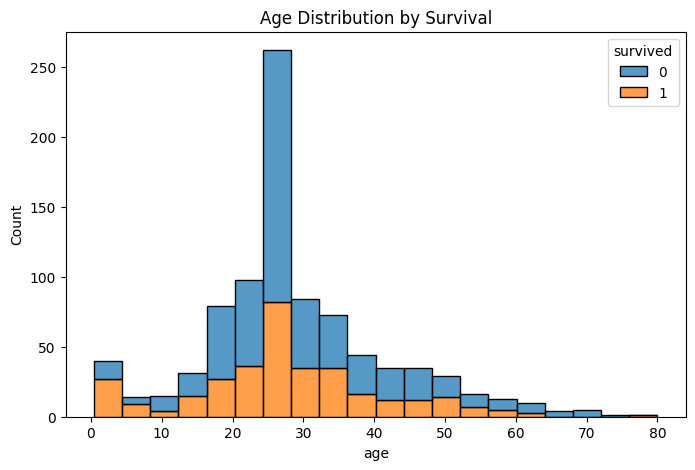

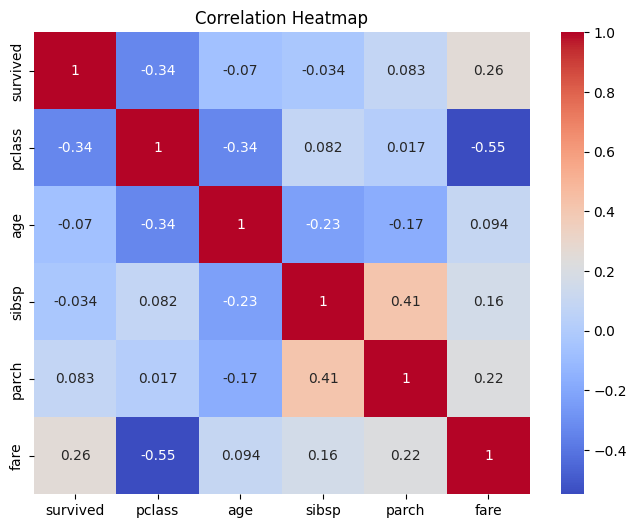


Insights:
1. Women had a much higher survival rate than men.
2. 1st Class passengers survived more often than 2nd and 3rd Class.
3. Age has a weak negative correlation with survival.


In [2]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display all columns
pd.set_option('display.max_columns', None)

# --- Step 2: Load Built-in Dataset ---
df = sns.load_dataset('titanic')  # Built-in Titanic dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# --- Step 3: Basic Info ---
print("\n--- Basic Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

# --- Step 4: Data Cleaning ---
# Fill missing 'age' with median
df['age'].fillna(df['age'].median(), inplace=True)
# Fill missing 'embark_town' with mode
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
# Drop 'deck' column (too many missing values)
df.drop(columns=['deck'], inplace=True)
# Drop any remaining missing values
df.dropna(inplace=True)

print("\nAfter Cleaning:")
print(df.isnull().sum())

# --- Step 5: Descriptive Statistics ---
print("\n--- Summary Statistics ---")
print(df.describe(include='all'))

# --- Step 6: Exploratory Data Analysis (EDA) ---
# Survival rate
print("\nSurvival Rate:")
print(df['survived'].value_counts(normalize=True) * 100)

# Survival by gender
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival by class
plt.figure(figsize=(6,4))
sns.barplot(x='class', y='survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

# Age distribution by survival
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='survived', multiple='stack', bins=20)
plt.title('Age Distribution by Survival')
plt.show()

# Correlation heatmap for numeric columns only
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include='number')  # Only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# --- Step 7: Key Insights ---
print("\nInsights:")
print("1. Women had a much higher survival rate than men.")
print("2. 1st Class passengers survived more often than 2nd and 3rd Class.")
print("3. Age has a weak negative correlation with survival.")
